In [1]:
import numpy as np
import torch
from torch.autograd import Variable
from torch import FloatTensor
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
import matplotlib.pyplot as plt
import torch.optim as optim
import data_processing

Downloaded to car.csv
Weights before training and testing: 
OrderedDict([('gate1Wz1', tensor([[ 1.9269],
        [ 1.4873],
        [ 0.9007],
        [-2.1055],
        [ 0.6784],
        [ 1.0783],
        [ 0.8008],
        [ 1.6806],
        [ 0.3559],
        [-0.6866],
        [-0.4934],
        [ 0.2415],
        [-1.1109],
        [ 0.0418],
        [-0.2516],
        [ 0.8599],
        [-0.3097],
        [-0.3957],
        [ 0.8034],
        [-0.6216],
        [-0.5920]])), ('gate1Wz2', tensor([[-0.4245],
        [ 0.3057],
        [-0.7746],
        [ 0.0349],
        [ 0.3211],
        [ 1.8113],
        [ 0.1606],
        [ 0.3672],
        [ 0.1754],
        [ 1.3852],
        [-0.4459],
        [ 1.4451],
        [ 0.8564],
        [-1.0759],
        [ 0.5357],
        [ 1.1754],
        [ 0.5612],
        [-0.4527],
        [-0.7718],
        [-0.1722],
        [ 0.5238]])), ('gate1Wx', tensor([[ 8.6540e-03],
        [-1.4229e-01],
        [ 1.9707e-01],
        [-1.1441

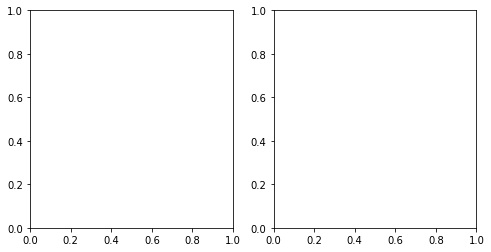

In [2]:
data = data_processing.load_data(download=True)
new_data = data_processing.convert2onehot(data)

# prepare training data
new_data = new_data.values.astype(np.float32)       # change to numpy array and float32
np.random.shuffle(new_data) # shuffles the data
sep = int(0.7*len(new_data)) # separate data [70% mark]
train_data = new_data[:sep]                         # training data (70%)
test_data = new_data[sep:]                          # test data (30%)

x_train = torch.from_numpy(train_data[:, :21])
y_train = torch.from_numpy(train_data[:, 21:]) # creating tensors for pytorch

x_test = torch.from_numpy(test_data[:, :21])
y_test = torch.from_numpy(test_data[:, 21:]) # ^^^

train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset = train_data, batch_size = 1) # create batches

test_data = TensorDataset(x_test, y_test)
test_loader = DataLoader(dataset = test_data, batch_size = 1) # create batches

# trying out and gate
class andgate(nn.Module):
    def __init__(self):
        super().__init__()
#        Dict = {}        
#        def generateParameters():

        inputSize = 21
        hiddenSize = 1
        # have to generate parameters and add bias [will do this later]
        self.gate1Wz1 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate1Wz2 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate1Wx = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate1Wy = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate2Wz1 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate2Wz2 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate2Wx = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate2Wy = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate3Wz1 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate3Wz2 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate3Wx = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate3Wy = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate4Wz1 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate4Wz2 = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate4Wx = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
        self.gate4Wy = nn.Parameter(torch.randn(inputSize, hiddenSize, requires_grad=True, dtype=torch.float))
                    
        
    def forward(self, X):
        def gate1():            
            # z1 is the first input [sum the values]
            z1 = torch.matmul(X, self.gate1Wz1)
            
            # z2 is the second input [sum the values]
            z2 = torch.matmul(X, self.gate1Wz2)
            
            # x is one possible output [sum the values]
            def x():
                x = torch.matmul(X, self.gate1Wx)
                return x# + bx

            # y is one possible output [sum the values]
            def y():
                y = torch.matmul(X, self.gate1Wy)
                return y #+ by

            def firstgate():
                if(z1 < 0):
                    result = x()
                else:
                    result = y()
                return result

            def secondgate():
                if(z2 < 0):
                    result = firstgate()
                else:
                    result = y()
                return result

            output = secondgate()
            return output
        
        def gate2():            
            # z1 is the first input [sum the values]
            z1 = torch.matmul(X, self.gate2Wz1)
           
            # z2 is the second input [sum the values]
            z2 = torch.matmul(X, self.gate2Wz2)
           
            # x is one possible output [sum the values]
            def x():
                x = torch.matmul(X, self.gate2Wx)
                return x# + bx

            # y is one possible output [sum the values]
            def y():
                y = torch.matmul(X, self.gate2Wy)
                return y #+ by

            def firstgate():
                if(z1 < 0):
                    result = x()
                else:
                    result = y()
                return result

            def secondgate():
                if(z2 < 0):
                    result = firstgate()
                else:
                    result = y()
                return result

            output = secondgate()
            return output

        def gate3():            
            # z1 is the first input [sum the values]
            z1 = torch.matmul(X, self.gate3Wz1)
           
            # z2 is the second input [sum the values]
            z2 = torch.matmul(X, self.gate3Wz2)
           
            # x is one possible output [sum the values]
            def x():
                x = torch.matmul(X, self.gate3Wx)
                return x# + bx

            # y is one possible output [sum the values]
            def y():
                y = torch.matmul(X, self.gate3Wy)
                return y #+ by

            def firstgate():
                if(z1 < 0):
                    result = x()
                else:
                    result = y()
                return result

            def secondgate():
                if(z2 < 0):
                    result = firstgate()
                else:
                    result = y()
                return result

            output = secondgate()
            return output
            
        def gate4():            
            # z1 is the first input [sum the values]
            z1 = torch.matmul(X, self.gate4Wz1)

            # z2 is the second input [sum the values]
            z2 = torch.matmul(X, self.gate4Wz2)

            # x is one possible output [sum the values]
            def x():
                x = torch.matmul(X, self.gate4Wx)
                return x# + bx

            # y is one possible output [sum the values]
            def y():
                y = torch.matmul(X, self.gate4Wy)
                return y #+ by

            def firstgate():
                if(z1 < 0):
                    result = x()
                else:
                    result = y()
                return result

            def secondgate():
                if(z2 < 0):
                    result = firstgate()
                else:
                    result = y()
                return result

            output = secondgate()
            return output
        # result is just the 4 gates' results right now
        results = [[gate1(), gate2(), gate3(), gate4()]]
        output = torch.tensor(results, requires_grad = True)
        return output

torch.manual_seed(42)
model = andgate()
print("Weights before training and testing: ")
print(model.state_dict())

lr = 1e-3
n_epochs = 10

loss_fn = nn.MSELoss(reduction='mean') # loss function
optimizer = optim.SGD(model.parameters(), lr=lr)

def make_train_step(model, loss_fn, optimizer):
    def train_step(X, y):
        model.train()
        yhat = model(X)
        loss = loss_fn(yhat, y)
        loss.backward(retain_graph = True)
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

train_step = make_train_step(model, loss_fn, optimizer)
losses = []
val_losses = []

plt.ion()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
accuracies, steps = [], []

for epoch in range(n_epochs):
    steps.append(epoch)
    
    for x_batch, y_batch in train_loader:
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
    
    with torch.no_grad():
        for x_test, y_test in test_loader:
            model.eval()
            yhat = model(x_test)
            test_loss = loss_fn(y_test, yhat)
            val_losses.append(test_loss.item())
        
#         ax1.cla()
#         ax1.set_xticks(range(4), ["accepted", "good", "unaccepted", "very good"])
#         ax1.set_ylim((0, 400))
#         ax2.cla()
#         ax2.plot(steps, val_losses, label="accuracy")
#         ax2.set_ylim(ymax=1)
#         ax2.set_ylabel("accuracy")
#         plt.pause(0.01)

print("Weights after training and testing:")
print(model.state_dict())

plt.ioff()
plt.show()

In [ ]:
'''
Ignore cell; from previous work.
'''

class GATES:
    def __init__(self):
        self.inputSize = 21
        self.outputSize = 1
        self.hiddenSize = 1209
        
        # weights [eventually want a set of different weights for each function]
        self.Wz1 = Variable(torch.randn(self.inputSize, self.hiddenSize), requires_grad = True) # random weights for 25 x 1209 tensor. stores the parameters from the input to hidden layer;
        self.bz1 = torch.randn(1, 1) # bias is a scalar
        self.Wz2 = Variable(torch.randn(self.inputSize, self.hiddenSize), requires_grad = True) # random weights for 25 x 1209 tensor.
        self.bz2 = torch.randn(1, 1) # bias is a scalar
        self.Wx = Variable(torch.randn(self.inputSize, self.hiddenSize), requires_grad = True) # random weights for 25 x 1209 tensor
        self.bX = torch.randn(1, 1) # bias is a scalar
        self.Wy = Variable(torch.randn(self.inputSize, self.hiddenSize), requires_grad = True) # random weights for 25 x 1209 tensor
        self.bY = torch.randn(1, 1) # bias is a scalar
        
        # ANDGATE
    def andgate(self, X):
        # z1 is the first input [sum the values]
        z1 = torch.matmul(X, self.Wz1)
        z1Sum = torch.sum(z1) + self.bz1
            
        # z2 is the second input [sum the values]
        z2 = torch.matmul(X, self.Wz2)
        z2Sum = torch.sum(z2) + self.bz2
        
        # x is one possible output [sum the values]
        def x():
            x = torch.matmul(X, self.Wx)
            return torch.sum(x) + self.bX

        # y is one possible output [sum the values]
        def y():
            y = torch.matmul(X, self.Wy)
            return torch.sum(y) + self.bY

        def firstgate():
            if(z1Sum < 0):
                result = x()
            else:
                result = y()
            return result

        def secondgate():
            if(z2Sum < 0):
                result = firstgate()
            else:
                result = y()
            return result

        return secondgate()

    def notgate(self, X):

        def x():
            x = torch.matmul(X, self.Wx) + self.bX
            return torch.sum(x)

        def y():
            y = torch.matmul(X, self.Wy) + self.bY
            return torch.sum(y)

        z1 = torch.matmul(X, self.Wz1) + self.bz1
        z1Sum = torch.sum(z1)

        if(z1Sum < 0):
            result = y()

        else:
            result = x()
        
        return result

        
    def orgate(self, X):
        
        # z1 is the first input [sum the values]
        z1 = torch.matmul(X, self.Wz1)
        z1Sum = torch.sum(z1) + self.bz1
            
        # z2 is the second input [sum the values]
        z2 = torch.matmul(X, self.Wz2)
        z2Sum = torch.sum(z2) + self.bz2
        
        # x is one possible output [sum the values]
        def x():
            x = torch.matmul(X, self.Wx)
            return torch.sum(x) + self.bX

        # y is one possible output [sum the values]
        def y():
            y = torch.matmul(X, self.Wy)
            return torch.sum(y) + self.bY

        def firstgate():
            if(z1Sum < 0):
                result = x()
            else:
                result = y()
            return result

        def secondgate():
            if(z2Sum < 0):
                result = x()
            else:
                result = firstgate()
            return result

        return secondgate()
        
        
o = GATES()
andOutput = o.andgate(train_data_x)
notOutput = o.notgate(train_data_x)
orOutput = o.orgate(train_data_x)

print("AND OUTPUT: ", andOutput)

target = Variable(torch.randn(1, 1), requires_grad = True)  # a dummy target, for example
print("TARGET IS: ", target)

criterion = nn.MSELoss() # Simple Mean Squared Loss

loss = criterion(andOutput, target)
print(loss) # their loss function

loss = Variable(loss, requires_grad = True)
loss.backward()
print(loss.grad.data)
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)
